<a href="https://colab.research.google.com/github/mohannashahrad/Borealis_AI_Plant_Tree_Project/blob/main/Training/Normalization%2BEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imort all the required libraries
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Functions
def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

In [ ]:
# Loading DataSet
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data2.csv')
df = df.iloc[: , 1:]
display(df.head())

,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2001,Afghanistan,652860.0,377530.0,12084.4,21606992.0,3.902805,22.169,NaN,NaN,NaN,NaN,NaN,810.0,13490.0,88.092712
1,2002,Afghanistan,652860.0,377530.0,12084.4,22600774.0,4.496719,22.261,4.055180e+09,NaN,0.958004,0.004341,0.029101,1100.0,16090.0,178.640364
2,2003,Afghanistan,652860.0,379100.0,12084.4,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255
3,2004,Afghanistan,652860.0,379110.0,12084.4,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959
4,2005,Afghanistan,652860.0,379100.0,12084.4,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834


In [ ]:
# Using standard Scaler 
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.reset_index(inplace=True, drop=True)
scaled_features = df.copy()
col_names = ['Land Area (m2)', 'Agriculture Land (m2)', 'Forest Land (m2)', 'Population', 'Pop Growth (%)', 'Urban Pop (%)',
                'GDP (US$)', 'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)',
                'GHG Emision (CO2 eqv)']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head(20)

,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2003,Afghanistan,-0.053191,0.151565,-0.280729,-0.121892,2.833507,-1.488437,-0.252053,0.966200,-0.325614,-0.195424,-0.367831,-0.225766,-0.238114,244.336255
1,2004,Afghanistan,-0.053191,0.151580,-0.280729,-0.114761,2.540205,-1.481744,-0.251572,-0.476629,-0.391587,-0.185539,-0.367980,-0.226046,-0.238385,201.444959
2,2005,Afghanistan,-0.053191,0.151565,-0.280729,-0.108437,1.999872,-1.472501,-0.250907,1.432500,-0.404847,-0.191614,-0.367914,-0.225396,-0.237467,235.956834
3,2006,Afghanistan,-0.053191,0.151565,-0.280729,-0.103127,1.414446,-1.463213,-0.250391,0.290338,-0.375773,-0.191342,-0.368358,-0.225013,-0.233669,152.084536
4,2007,Afghanistan,-0.053191,0.151565,-0.280729,-0.098576,0.994354,-1.453834,-0.248513,1.937539,-0.402332,-0.119929,-0.369223,-0.224477,-0.229663,252.841662
5,2008,Afghanistan,-0.053191,0.151565,-0.280729,-0.094337,0.803583,-1.444410,-0.248268,0.011733,-0.399720,0.042073,-0.369056,-0.221887,-0.222715,107.406248
6,2009,Afghanistan,-0.053191,0.151565,-0.280729,-0.089751,0.912439,-1.434940,-0.246692,3.408774,-0.418547,-0.065209,-0.370296,-0.219832,-0.217061,70.405497
7,2010,Afghanistan,-0.053191,0.151580,-0.280729,-0.084360,1.208153,-1.425424,-0.244379,2.041814,-0.398589,0.028639,-0.370353,-0.216425,-0.208767,87.728453
8,2011,Afghanistan,-0.053191,0.151565,-0.280729,-0.078006,1.543496,-1.415817,-0.243061,-0.668749,-0.410307,0.338492,-0.370161,-0.211845,-0.194433,112.955062
9,2012,Afghanistan,-0.053191,0.151565,-0.280729,-0.070889,1.767199,-1.406165,-0.241575,1.728640,-0.421154,0.092211,-0.358186,-0.214154,-0.185983,39.307616


In [ ]:
# Normalization (Not used in this version)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.reset_index(inplace=True, drop=True)
cols_to_norm = ['Land Area (m2)', 'Agriculture Land (m2)', 'Forest Land (m2)', 'Population', 'Pop Growth (%)', 'Urban Pop (%)',
                'GDP (US$)', 'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)',
                'GHG Emision (CO2 eqv)']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2003,Afghanistan,0.039839,0.071657,0.001482,0.016972,0.818313,0.151760,0.000207,0.382842,0.016440,0.000286,0.000400,0.000124,0.001343,244.336255
1,2004,Afghanistan,0.039839,0.071659,0.001482,0.017723,0.784990,0.153366,0.000241,0.342790,0.009597,0.000634,0.000381,0.000103,0.001322,201.444959
2,2005,Afghanistan,0.039839,0.071657,0.001482,0.018389,0.723601,0.155584,0.000289,0.395786,0.008221,0.000420,0.000389,0.000152,0.001393,235.956834
3,2006,Afghanistan,0.039839,0.071657,0.001482,0.018948,0.657090,0.157813,0.000326,0.364080,0.011237,0.000430,0.000332,0.000181,0.001688,152.084536
4,2007,Afghanistan,0.039839,0.071657,0.001482,0.019427,0.609362,0.160063,0.000460,0.409805,0.008482,0.002943,0.000220,0.000222,0.001998,252.841662
5,2008,Afghanistan,0.039839,0.071657,0.001482,0.019874,0.587688,0.162324,0.000478,0.356347,0.008753,0.008645,0.000242,0.000419,0.002537,107.406248
6,2009,Afghanistan,0.039839,0.071657,0.001482,0.020357,0.600055,0.164597,0.000591,0.450645,0.006800,0.004869,0.000082,0.000575,0.002976,70.405497
7,2010,Afghanistan,0.039839,0.071659,0.001482,0.020924,0.633652,0.166880,0.000757,0.412700,0.008870,0.008172,0.000074,0.000834,0.003620,87.728453
8,2011,Afghanistan,0.039839,0.071657,0.001482,0.021593,0.671751,0.169185,0.000851,0.337457,0.007655,0.019078,0.000099,0.001182,0.004732,112.955062
9,2012,Afghanistan,0.039839,0.071657,0.001482,0.022343,0.697167,0.171501,0.000958,0.404006,0.006530,0.010410,0.001645,0.001006,0.005387,39.307616


In [ ]:
# One-hot encoding for discrete columns 
discrete_columns = ["Country Name"]

for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)

df.head(30)

,Time,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha),Country Name_Afghanistan,Country Name_Albania,Country Name_Algeria,Country Name_Angola,Country Name_Antigua and Barbuda,Country Name_Argentina,Country Name_Armenia,Country Name_Australia,Country Name_Austria,Country Name_Azerbaijan,"Country Name_Bahamas, The",Country Name_Bangladesh,Country Name_Barbados,Country Name_Belarus,Country Name_Belgium,Country Name_Belize,Country Name_Benin,Country Name_Bhutan,Country Name_Bolivia,Country Name_Bosnia and Herzegovina,Country Name_Botswana,Country Name_Brazil,Country Name_Brunei Darussalam,Country Name_Bulgaria,Country Name_Burkina Faso,...,Country Name_Senegal,Country Name_Serbia,Country Name_Seychelles,Country Name_Sierra Leone,Country Name_Singapore,Country Name_Slovak Republic,Country Name_Slovenia,Country Name_Solomon Islands,Country Name_South Africa,Country Name_South Sudan,Country Name_Spain,Country Name_Sri Lanka,Country Name_St. Kitts and Nevis,Country Name_St. Lucia,Country Name_St. Vincent and the Grenadines,Country Name_Sudan,Country Name_Suriname,Country Name_Sweden,Country Name_Switzerland,Country Name_Syrian Arab Republic,Country Name_Tajikistan,Country Name_Tanzania,Country Name_Thailand,Country Name_Timor-Leste,Country Name_Togo,Country Name_Trinidad and Tobago,Country Name_Tunisia,Country Name_Turkey,Country Name_Turkmenistan,Country Name_Uganda,Country Name_Ukraine,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Zambia,Country Name_Zimbabwe
0,2003,652860.0,379100.00,12084.400,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,652860.0,379110.00,12084.400,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,652860.0,379100.00,12084.400,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,652860.0,379100.00,12084.400,26433058.0,2.990524,22.907,6.971286e+09,5.357403,0.454077,0.011152,0.022144,1940.0,21040.0,152.084536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,652860.0,379100.00,12084.400,27100542.0,2.493830,23.113,9.747880e+09,13.826320,0.342749,0.076415,0.014696,2360.0,24880.0,252.841662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2008,652860.0,379100.00,12084.400,27722281.0,2.268273,23.320,1.010923e+10,3.924984,0.353698,0.224465,0.016138,4390.0,31540.0,107.406248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# Splitting the dataset into training and test parts
y = df['Tree Loss (ha)']
x = df.loc[:, df.columns != 'Tree Loss (ha)']
x = x[~x.isin([np.nan, np.inf, -np.inf]).any(1)]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(2296, 184)
(574, 184)


In [ ]:
# Defining the first Logistic Regression Model and Training

model = LinearRegression()  
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
display(compare_df)

,Actual,Predicted
0,16356.445450,5080.518655
1,57883.220930,29725.921219
2,902.670348,37898.814009
3,99820.579630,53760.118706
4,49140.154900,44860.631214
...,...,...
569,6660.339483,382.340358
570,7730.473436,13207.948689
571,253840.008700,208800.824063
572,2238.446401,37588.642978


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

Mean Absolute Error: 41022.272179472646
Mean Squared Error: 14867364188.221167
Root Mean Squared Error: 121931.80138184282
R2 score: 0.9445954092181921


In [ ]:
# Using XGBoost 

# Note: Hyper-parameter tuning is not included in this version yet. 

import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

[20:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 28311.079945337915
Mean Squared Error: 14706837055.148785
Root Mean Squared Error: 121271.74879232502
R2 score: 0.942829020780566


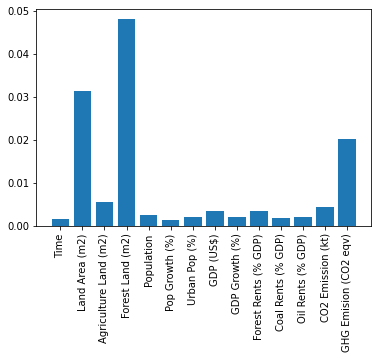

In [ ]:
# Feature Importance using XGBoost
from matplotlib import pyplot
pyplot.bar(range(14), xg_reg.feature_importances_[:14])
LABELS = x.columns[:14]
pyplot.xticks(range(len(xg_reg.feature_importances_[:14])), LABELS, rotation='vertical')
pyplot.show()

In [ ]:
# Time series analysis (ARIMA)
from statsmodels.tsa.arima_model import ARIMA

ts_df = df[['Time', 'Tree Loss (ha)']]
ts_df['Country'] = country_names
ts_df.index = ts_df['Country']
predictions = list()
expectations = list()
for name in ts_df.Country.unique():
  tmp_df = ts_df.loc[name, ['Time', 'Tree Loss (ha)']]
  time_index = tmp_df['Time']
  if (type(time_index) is np.int64):
    continue
  tmp_df.index = time_index
  del tmp_df['Time']
  vals = tmp_df.to_numpy().flatten()
  train, test = vals[0:len(vals) - 1], vals[len(vals) - 1]
  history = [x for x in train]
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  expectations.append(test)
  print('predicted=%f, expected=%f' % (yhat, test))

rmse = sqrt(mean_squared_error(expectations, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(expextations)
pyplot.plot(predictions, color='red')
pyplot.show()